 ### Задачи 1 и 2

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

### Решение

Случайная величина X может принимать значения от 0 до 5. Она
распределена по биномиальному закону с параметрами n = 5 (число вопросов) и p = 0.25 (вероятность угадать правильный ответ). Вероятность угадывания нескольких вариантов ответа можно определить по формуле Бернулли:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

In [1]:
import numpy as np

In [2]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [3]:
P = []
for i in range(0, 6):
  r = combinations(5, i)*0.25**i*0.75**(5-i)
  P.append(r)
print(P)


[0.2373046875, 0.3955078125, 0.263671875, 0.087890625, 0.0146484375, 0.0009765625]


Теперь построим график распределения случайной величины X:

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [5]:
values = [0, 1, 2, 3, 4, 5]
z = pd.DataFrame({'value': values, 'probability': P})
z

,value,probability
0,0,0.237305
1,1,0.395508
2,2,0.263672
3,3,0.087891
4,4,0.014648
5,5,0.000977


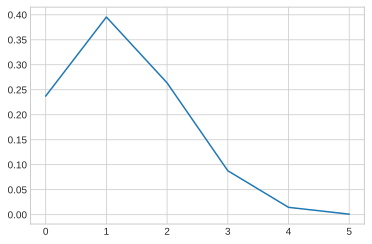

In [6]:
plt.plot(z['value'],z['probability'])

Чтобы посчитать математическое ожидание M(X), нужно поэлементно перемножить значения в массиве z, затем сложить результаты:


In [7]:
x_values = z['value']
x_probabilities = z['probability']
m = (x_values * x_probabilities).sum()
print(m)

1.25


Теперь найдем дисперсию D(X). Для начала рассчитаем отклонения X от мат. ожидания:

In [9]:
y_values = x_values - m
print(y_values)

0   -1.25
1   -0.25
2    0.75
3    1.75
4    2.75
5    3.75
Name: value, dtype: float64


Теперь найдем квадрат отклонений:

In [10]:
z_values = y_values ** 2
print(z_values)

0     1.5625
1     0.0625
2     0.5625
3     3.0625
4     7.5625
5    14.0625
Name: value, dtype: float64


In [11]:
d = (z_values * x_probabilities).sum()
print(d)

0.9375


### Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

### Решение

Мы имеем дело с распределением Пуассона. Известные нам параметры $\lambda$ = 10 и p = 0.95. Для того, чтобы найти N, будем складывать вероятности получить 0, 1 , 2 и т.д. писем в день пока суммарная вероятность этих событий не достигнет 0.95.

In [13]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [16]:
sum_p = 0
for i in range(0, 20):
  if sum_p < 0.95:
    sum_p = sum_p + poisson_proba(i, 10)
  else:
    N = i
    break
print(N)




16


Ответ: N = 16

### Задача 4

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

### Решение

Воспользуемся формулой Бернулли:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

По условиям задачи  k >= 6, p = 0.01, P = 0.9. Пусть событие A - это попадание в цель 6 и более раз, а событие $\overline{A}$ - попадание в цель менее 6 раз. Вероятность события P($\overline{A}$) = 1 - 0.9 = 0.1. В то же время эта вероятность является суммой вероятностей отдельных событий (попадание 0 раз , 1 раз и т.д.), которые можно вычислить по формуле Бернулли. Будем перебирать количество выстрелов n, пока не достигнем вероятности в 0.1 для события $\overline{A}$.

In [18]:
sum_p = 0
for i in range(5, 1):
  if sum_p < 0.1:
    for k in range(0, 6):
      sum_p = combinations(i, k)*0.01**k*0.99**(i-k)
  else:
    n = i
    break
print(n)

300


Ответ: n = 300